In [53]:
import os
import json
import time
import requests
import tqdm
import pandas as pd
from scipy.spatial import KDTree
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Mocking up the DataFrame with the additional columns
Final_Real_Estate_Pos

NameError: name 'Final_Real_Estate_Pos' is not defined

In [15]:
property_types = [
    "villa", "condo", "terraced house", "holiday house", "cooperative",
    "farm", "hobby farm", "full year plot", "villa apartment", 
    "holiday plot", "houseboat"
]


In [16]:
# Load already completed pages if available
completed_pages_file = 'completed_pages.json'
completed_pages = {}

if os.path.exists(completed_pages_file):
    try:
        with open(completed_pages_file, 'r') as f:
            completed_pages = json.load(f)
            # Convert lists back to sets
            for key in completed_pages:
                completed_pages[key] = set(completed_pages[key])
    except json.JSONDecodeError:
        print(f"Warning: Could not decode JSON from {completed_pages_file}. Initializing a new empty dictionary.")


In [17]:
all_dataframes = []  # List to store DataFrames for each property type

for property_type in property_types:
    print(f"Scraping data for: {property_type}")
    property_links = []
    
    for page in range(1, 201):  # Iterate over the first 200 pages for each property type
        if completed_pages.get(property_type, set()).issuperset({page}):
            print(f"Skipping already downloaded page {page} for {property_type}")
            continue
        
        url = f'https://api.boligsiden.dk/search/cases?addressTypes={property_type.replace(" ", "%20")}&per_page=50&page={page}&sortAscending=true&sortBy=timeOnMarket'
        property_links.append((url, page))


Scraping data for: villa
Scraping data for: condo
Scraping data for: terraced house
Scraping data for: holiday house
Scraping data for: cooperative
Scraping data for: farm
Scraping data for: hobby farm
Scraping data for: full year plot
Scraping data for: villa apartment
Scraping data for: holiday plot
Scraping data for: houseboat
Skipping already downloaded page 200 for houseboat


In [18]:
    all_real_estate_postings = []  # To store all real estate postings for the current property type

    for url, page in tqdm.tqdm(property_links):
        try:
            response = requests.get(url, headers={'name': 'Tobias Thiim , Københavns Universitet'})
            response.raise_for_status()
        except Exception as e:
            print(url)  # Print URL
            print(e)  # Print error
            continue  # Continue to the next iteration of the loop

        result = response.json()
        real_estate_postings = result.get('cases', [])
        
        if real_estate_postings is None:
            print(f"Warning: Received 'None' for postings at page {page} for {property_type}")
            continue  # Skip this page if no data is retrieved
        
        all_real_estate_postings.extend(real_estate_postings)


  1%|▊                                                                                 | 2/199 [00:02<04:14,  1.29s/it]

  2%|█▏                                                                                | 3/199 [00:03<04:03,  1.24s/it]

  2%|█▋                                                                                | 4/199 [00:04<03:53,  1.20s/it]

  3%|██                                                                                | 5/199 [00:06<03:50,  1.19s/it]

  3%|██▍                                                                               | 6/199 [00:07<03:47,  1.18s/it]

  4%|██▉                                                                               | 7/199 [00:08<03:46,  1.18s/it]

  4%|███▎                                                                              | 8/199 [00:09<03:44,  1.17s/it]

  5%|███▋                                                                              | 9/199 [00:10<03:42,  1.17s/it]

  5%|████                                                                             | 10/199 [00:11<03:39,  1.16s/it]

  6%|████▍                                                                            | 11/199 [00:13<03:36,  1.15s/it]

  6%|████▉                                                                            | 12/199 [00:14<03:34,  1.15s/it]

  7%|█████▎                                                                           | 13/199 [00:15<03:35,  1.16s/it]

  7%|█████▋                                                                           | 14/199 [00:16<03:33,  1.15s/it]

  8%|██████                                                                           | 15/199 [00:17<03:30,  1.15s/it]

  8%|██████▌                                                                          | 16/199 [00:18<03:30,  1.15s/it]

  9%|██████▉                                                                          | 17/199 [00:19<03:29,  1.15s/it]

  9%|███████▎                                                                         | 18/199 [00:21<03:29,  1.15s/it]

 10%|███████▋                                                                         | 19/199 [00:22<03:28,  1.16s/it]

 10%|████████▏                                                                        | 20/199 [00:23<03:28,  1.17s/it]

 11%|████████▌                                                                        | 21/199 [00:24<03:29,  1.18s/it]

 11%|████████▉                                                                        | 22/199 [00:25<03:30,  1.19s/it]

 12%|█████████▎                                                                       | 23/199 [00:27<03:29,  1.19s/it]

 12%|█████████▊                                                                       | 24/199 [00:28<03:27,  1.19s/it]

 13%|██████████▏                                                                      | 25/199 [00:29<03:23,  1.17s/it]

 13%|██████████▌                                                                      | 26/199 [00:30<03:22,  1.17s/it]

 14%|██████████▉                                                                      | 27/199 [00:31<03:20,  1.16s/it]

 14%|███████████▍                                                                     | 28/199 [00:32<03:20,  1.17s/it]

 15%|███████████▊                                                                     | 29/199 [00:34<03:18,  1.17s/it]

 15%|████████████▏                                                                    | 30/199 [00:35<03:18,  1.17s/it]

 16%|████████████▌                                                                    | 31/199 [00:36<03:15,  1.17s/it]

 16%|█████████████                                                                    | 32/199 [00:37<03:13,  1.16s/it]

 17%|█████████████▍                                                                   | 33/199 [00:38<03:12,  1.16s/it]

 17%|█████████████▊                                                                   | 34/199 [00:39<03:11,  1.16s/it]

 18%|██████████████▏                                                                  | 35/199 [00:41<03:09,  1.16s/it]

 18%|██████████████▋                                                                  | 36/199 [00:42<03:10,  1.17s/it]

 19%|███████████████                                                                  | 37/199 [00:43<03:09,  1.17s/it]

 19%|███████████████▍                                                                 | 38/199 [00:44<03:06,  1.16s/it]

 20%|███████████████▊                                                                 | 39/199 [00:45<03:05,  1.16s/it]

 20%|████████████████▎                                                                | 40/199 [00:46<03:04,  1.16s/it]

 21%|████████████████▋                                                                | 41/199 [00:48<03:04,  1.17s/it]

 21%|█████████████████                                                                | 42/199 [00:49<03:01,  1.16s/it]

 22%|█████████████████▌                                                               | 43/199 [00:50<03:02,  1.17s/it]

 22%|█████████████████▉                                                               | 44/199 [00:51<03:00,  1.16s/it]

 23%|██████████████████▎                                                              | 45/199 [00:52<02:57,  1.16s/it]

 23%|██████████████████▋                                                              | 46/199 [00:53<02:56,  1.15s/it]

 24%|███████████████████▏                                                             | 47/199 [00:54<02:55,  1.16s/it]

 24%|███████████████████▌                                                             | 48/199 [00:56<02:55,  1.16s/it]

 25%|███████████████████▉                                                             | 49/199 [00:57<02:54,  1.16s/it]

 25%|████████████████████▎                                                            | 50/199 [00:58<02:52,  1.16s/it]

 26%|████████████████████▊                                                            | 51/199 [00:59<02:50,  1.15s/it]

 26%|█████████████████████▏                                                           | 52/199 [01:00<02:49,  1.15s/it]

 27%|█████████████████████▌                                                           | 53/199 [01:01<02:49,  1.16s/it]

 27%|█████████████████████▉                                                           | 54/199 [01:03<02:46,  1.15s/it]

 28%|██████████████████████▍                                                          | 55/199 [01:04<02:46,  1.16s/it]

 28%|██████████████████████▊                                                          | 56/199 [01:05<02:44,  1.15s/it]

 29%|███████████████████████▏                                                         | 57/199 [01:06<02:44,  1.16s/it]

 29%|███████████████████████▌                                                         | 58/199 [01:07<02:45,  1.17s/it]

 30%|████████████████████████                                                         | 59/199 [01:08<02:42,  1.16s/it]

 30%|████████████████████████▍                                                        | 60/199 [01:10<02:40,  1.16s/it]

 31%|████████████████████████▊                                                        | 61/199 [01:11<02:40,  1.16s/it]

 31%|█████████████████████████▏                                                       | 62/199 [01:12<02:39,  1.16s/it]

 32%|█████████████████████████▋                                                       | 63/199 [01:13<02:37,  1.16s/it]

 32%|██████████████████████████                                                       | 64/199 [01:14<02:34,  1.15s/it]

 33%|██████████████████████████▍                                                      | 65/199 [01:15<02:35,  1.16s/it]

 33%|██████████████████████████▊                                                      | 66/199 [01:16<02:33,  1.15s/it]

 34%|███████████████████████████▎                                                     | 67/199 [01:18<02:32,  1.16s/it]

 34%|███████████████████████████▋                                                     | 68/199 [01:19<02:30,  1.15s/it]

 35%|████████████████████████████                                                     | 69/199 [01:20<02:30,  1.16s/it]

 35%|████████████████████████████▍                                                    | 70/199 [01:21<02:29,  1.16s/it]

 36%|████████████████████████████▉                                                    | 71/199 [01:22<02:27,  1.15s/it]

 36%|█████████████████████████████▎                                                   | 72/199 [01:23<02:24,  1.14s/it]

 37%|█████████████████████████████▋                                                   | 73/199 [01:24<02:23,  1.14s/it]

 37%|██████████████████████████████                                                   | 74/199 [01:26<02:21,  1.13s/it]

 38%|██████████████████████████████▌                                                  | 75/199 [01:27<02:21,  1.14s/it]

 38%|██████████████████████████████▉                                                  | 76/199 [01:28<02:19,  1.13s/it]

 39%|███████████████████████████████▎                                                 | 77/199 [01:29<02:17,  1.13s/it]

 39%|███████████████████████████████▋                                                 | 78/199 [01:30<02:17,  1.14s/it]

 40%|████████████████████████████████▏                                                | 79/199 [01:31<02:17,  1.14s/it]

 40%|████████████████████████████████▌                                                | 80/199 [01:32<02:15,  1.14s/it]

 41%|████████████████████████████████▉                                                | 81/199 [01:34<02:14,  1.14s/it]

 41%|█████████████████████████████████▍                                               | 82/199 [01:35<02:12,  1.13s/it]

 42%|█████████████████████████████████▊                                               | 83/199 [01:36<02:12,  1.14s/it]

 42%|██████████████████████████████████▏                                              | 84/199 [01:37<02:11,  1.14s/it]

 43%|██████████████████████████████████▌                                              | 85/199 [01:38<02:11,  1.15s/it]

 43%|███████████████████████████████████                                              | 86/199 [01:39<02:09,  1.15s/it]

 44%|███████████████████████████████████▍                                             | 87/199 [01:40<02:10,  1.16s/it]

 44%|███████████████████████████████████▊                                             | 88/199 [01:42<02:09,  1.17s/it]

 45%|████████████████████████████████████▏                                            | 89/199 [01:43<02:08,  1.16s/it]

 45%|████████████████████████████████████▋                                            | 90/199 [01:44<02:05,  1.16s/it]

 46%|█████████████████████████████████████                                            | 91/199 [01:45<02:05,  1.16s/it]

 46%|█████████████████████████████████████▍                                           | 92/199 [01:46<02:04,  1.16s/it]

 47%|█████████████████████████████████████▊                                           | 93/199 [01:47<02:02,  1.15s/it]

 47%|██████████████████████████████████████▎                                          | 94/199 [01:49<02:00,  1.15s/it]

 48%|██████████████████████████████████████▋                                          | 95/199 [01:50<01:59,  1.15s/it]

 48%|███████████████████████████████████████                                          | 96/199 [01:51<01:59,  1.16s/it]

 49%|███████████████████████████████████████▍                                         | 97/199 [01:52<01:58,  1.16s/it]

 49%|███████████████████████████████████████▉                                         | 98/199 [01:53<01:56,  1.16s/it]

 50%|████████████████████████████████████████▎                                        | 99/199 [01:54<01:55,  1.16s/it]

 50%|████████████████████████████████████████▏                                       | 100/199 [01:56<01:55,  1.16s/it]

 51%|████████████████████████████████████████▌                                       | 101/199 [01:57<01:53,  1.16s/it]

 51%|█████████████████████████████████████████                                       | 102/199 [01:58<01:53,  1.17s/it]

 52%|█████████████████████████████████████████▍                                      | 103/199 [01:59<01:50,  1.15s/it]

 52%|█████████████████████████████████████████▊                                      | 104/199 [02:00<01:49,  1.15s/it]

 53%|██████████████████████████████████████████▏                                     | 105/199 [02:01<01:48,  1.15s/it]

 53%|██████████████████████████████████████████▌                                     | 106/199 [02:02<01:47,  1.16s/it]

 54%|███████████████████████████████████████████                                     | 107/199 [02:04<01:46,  1.16s/it]

 54%|███████████████████████████████████████████▍                                    | 108/199 [02:05<01:45,  1.16s/it]

 55%|███████████████████████████████████████████▊                                    | 109/199 [02:06<01:45,  1.17s/it]

 55%|████████████████████████████████████████████▏                                   | 110/199 [02:07<01:44,  1.17s/it]

 56%|████████████████████████████████████████████▌                                   | 111/199 [02:08<01:43,  1.17s/it]

 56%|█████████████████████████████████████████████                                   | 112/199 [02:10<01:41,  1.17s/it]

 57%|█████████████████████████████████████████████▍                                  | 113/199 [02:11<01:40,  1.17s/it]

 57%|█████████████████████████████████████████████▊                                  | 114/199 [02:12<01:39,  1.17s/it]

 58%|██████████████████████████████████████████████▏                                 | 115/199 [02:13<01:38,  1.17s/it]

 58%|██████████████████████████████████████████████▋                                 | 116/199 [02:14<01:37,  1.17s/it]

 59%|███████████████████████████████████████████████                                 | 117/199 [02:15<01:36,  1.17s/it]

 59%|███████████████████████████████████████████████▍                                | 118/199 [02:17<01:35,  1.18s/it]

 60%|███████████████████████████████████████████████▊                                | 119/199 [02:18<01:33,  1.16s/it]

 60%|████████████████████████████████████████████████▏                               | 120/199 [02:19<01:31,  1.16s/it]

 61%|████████████████████████████████████████████████▋                               | 121/199 [02:20<01:31,  1.17s/it]

 61%|█████████████████████████████████████████████████                               | 122/199 [02:21<01:29,  1.16s/it]

 62%|█████████████████████████████████████████████████▍                              | 123/199 [02:22<01:27,  1.15s/it]

 62%|█████████████████████████████████████████████████▊                              | 124/199 [02:23<01:26,  1.15s/it]

 63%|██████████████████████████████████████████████████▎                             | 125/199 [02:25<01:25,  1.16s/it]

 63%|██████████████████████████████████████████████████▋                             | 126/199 [02:26<01:24,  1.16s/it]

 64%|███████████████████████████████████████████████████                             | 127/199 [02:27<01:23,  1.16s/it]

 64%|███████████████████████████████████████████████████▍                            | 128/199 [02:28<01:22,  1.17s/it]

 65%|███████████████████████████████████████████████████▊                            | 129/199 [02:29<01:21,  1.17s/it]

 65%|████████████████████████████████████████████████████▎                           | 130/199 [02:30<01:20,  1.17s/it]

 66%|████████████████████████████████████████████████████▋                           | 131/199 [02:32<01:19,  1.16s/it]

 66%|█████████████████████████████████████████████████████                           | 132/199 [02:33<01:18,  1.18s/it]

 67%|█████████████████████████████████████████████████████▍                          | 133/199 [02:34<01:16,  1.16s/it]

 67%|█████████████████████████████████████████████████████▊                          | 134/199 [02:35<01:15,  1.16s/it]

 68%|██████████████████████████████████████████████████████▎                         | 135/199 [02:36<01:14,  1.16s/it]

 68%|██████████████████████████████████████████████████████▋                         | 136/199 [02:37<01:13,  1.16s/it]

 69%|███████████████████████████████████████████████████████                         | 137/199 [02:39<01:11,  1.16s/it]

 69%|███████████████████████████████████████████████████████▍                        | 138/199 [02:40<01:10,  1.16s/it]

 70%|███████████████████████████████████████████████████████▉                        | 139/199 [02:41<01:09,  1.16s/it]

 70%|████████████████████████████████████████████████████████▎                       | 140/199 [02:42<01:08,  1.16s/it]

 71%|████████████████████████████████████████████████████████▋                       | 141/199 [02:43<01:07,  1.16s/it]

 71%|█████████████████████████████████████████████████████████                       | 142/199 [02:44<01:05,  1.15s/it]

 72%|█████████████████████████████████████████████████████████▍                      | 143/199 [02:46<01:04,  1.15s/it]

 72%|█████████████████████████████████████████████████████████▉                      | 144/199 [02:47<01:03,  1.15s/it]

 73%|██████████████████████████████████████████████████████████▎                     | 145/199 [02:48<01:01,  1.15s/it]

 73%|██████████████████████████████████████████████████████████▋                     | 146/199 [02:49<01:01,  1.16s/it]

 74%|███████████████████████████████████████████████████████████                     | 147/199 [02:50<01:00,  1.16s/it]

 74%|███████████████████████████████████████████████████████████▍                    | 148/199 [02:51<00:58,  1.14s/it]

 75%|███████████████████████████████████████████████████████████▉                    | 149/199 [02:52<00:57,  1.15s/it]

 75%|████████████████████████████████████████████████████████████▎                   | 150/199 [02:54<00:56,  1.16s/it]

 76%|████████████████████████████████████████████████████████████▋                   | 151/199 [02:55<00:56,  1.17s/it]

 76%|█████████████████████████████████████████████████████████████                   | 152/199 [02:56<00:54,  1.16s/it]

 77%|█████████████████████████████████████████████████████████████▌                  | 153/199 [02:57<00:53,  1.16s/it]

 77%|█████████████████████████████████████████████████████████████▉                  | 154/199 [02:58<00:52,  1.17s/it]

 78%|██████████████████████████████████████████████████████████████▎                 | 155/199 [02:59<00:51,  1.18s/it]

 78%|██████████████████████████████████████████████████████████████▋                 | 156/199 [03:01<00:50,  1.17s/it]

 79%|███████████████████████████████████████████████████████████████                 | 157/199 [03:02<00:49,  1.17s/it]

 79%|███████████████████████████████████████████████████████████████▌                | 158/199 [03:03<00:47,  1.15s/it]

 80%|███████████████████████████████████████████████████████████████▉                | 159/199 [03:04<00:46,  1.16s/it]

 80%|████████████████████████████████████████████████████████████████▎               | 160/199 [03:05<00:45,  1.16s/it]

 81%|████████████████████████████████████████████████████████████████▋               | 161/199 [03:06<00:44,  1.16s/it]

 81%|█████████████████████████████████████████████████████████████████▏              | 162/199 [03:08<00:42,  1.16s/it]

 82%|█████████████████████████████████████████████████████████████████▌              | 163/199 [03:09<00:41,  1.16s/it]

 82%|█████████████████████████████████████████████████████████████████▉              | 164/199 [03:10<00:40,  1.15s/it]

 83%|██████████████████████████████████████████████████████████████████▎             | 165/199 [03:11<00:39,  1.16s/it]

 83%|██████████████████████████████████████████████████████████████████▋             | 166/199 [03:12<00:38,  1.16s/it]

 84%|███████████████████████████████████████████████████████████████████▏            | 167/199 [03:13<00:37,  1.17s/it]

 84%|███████████████████████████████████████████████████████████████████▌            | 168/199 [03:15<00:36,  1.17s/it]

 85%|███████████████████████████████████████████████████████████████████▉            | 169/199 [03:16<00:34,  1.16s/it]

 85%|████████████████████████████████████████████████████████████████████▎           | 170/199 [03:17<00:33,  1.17s/it]

 86%|████████████████████████████████████████████████████████████████████▋           | 171/199 [03:18<00:32,  1.17s/it]

 86%|█████████████████████████████████████████████████████████████████████▏          | 172/199 [03:19<00:31,  1.17s/it]

 87%|█████████████████████████████████████████████████████████████████████▌          | 173/199 [03:20<00:30,  1.16s/it]

 87%|█████████████████████████████████████████████████████████████████████▉          | 174/199 [03:22<00:29,  1.17s/it]

 88%|██████████████████████████████████████████████████████████████████████▎         | 175/199 [03:23<00:27,  1.16s/it]

 88%|██████████████████████████████████████████████████████████████████████▊         | 176/199 [03:24<00:26,  1.17s/it]

 89%|███████████████████████████████████████████████████████████████████████▏        | 177/199 [03:25<00:25,  1.17s/it]

 89%|███████████████████████████████████████████████████████████████████████▌        | 178/199 [03:26<00:24,  1.17s/it]

 90%|███████████████████████████████████████████████████████████████████████▉        | 179/199 [03:27<00:23,  1.16s/it]

 90%|████████████████████████████████████████████████████████████████████████▎       | 180/199 [03:29<00:21,  1.15s/it]

 91%|████████████████████████████████████████████████████████████████████████▊       | 181/199 [03:30<00:20,  1.15s/it]

 91%|█████████████████████████████████████████████████████████████████████████▏      | 182/199 [03:31<00:19,  1.15s/it]

 92%|█████████████████████████████████████████████████████████████████████████▌      | 183/199 [03:32<00:18,  1.15s/it]

 92%|█████████████████████████████████████████████████████████████████████████▉      | 184/199 [03:33<00:17,  1.15s/it]

 93%|██████████████████████████████████████████████████████████████████████████▎     | 185/199 [03:34<00:16,  1.16s/it]

 93%|██████████████████████████████████████████████████████████████████████████▊     | 186/199 [03:35<00:15,  1.16s/it]

 94%|███████████████████████████████████████████████████████████████████████████▏    | 187/199 [03:37<00:13,  1.16s/it]

 94%|███████████████████████████████████████████████████████████████████████████▌    | 188/199 [03:38<00:12,  1.17s/it]

 95%|███████████████████████████████████████████████████████████████████████████▉    | 189/199 [03:39<00:11,  1.17s/it]

 95%|████████████████████████████████████████████████████████████████████████████▍   | 190/199 [03:40<00:10,  1.17s/it]

 96%|████████████████████████████████████████████████████████████████████████████▊   | 191/199 [03:41<00:09,  1.17s/it]

 96%|█████████████████████████████████████████████████████████████████████████████▏  | 192/199 [03:42<00:08,  1.17s/it]

 97%|█████████████████████████████████████████████████████████████████████████████▌  | 193/199 [03:44<00:07,  1.17s/it]

 97%|█████████████████████████████████████████████████████████████████████████████▉  | 194/199 [03:45<00:05,  1.17s/it]

 98%|██████████████████████████████████████████████████████████████████████████████▍ | 195/199 [03:46<00:04,  1.18s/it]

 98%|██████████████████████████████████████████████████████████████████████████████▊ | 196/199 [03:47<00:03,  1.18s/it]

 99%|███████████████████████████████████████████████████████████████████████████████▏| 197/199 [03:48<00:02,  1.18s/it]

 99%|███████████████████████████████████████████████████████████████████████████████▌| 198/199 [03:50<00:01,  1.18s/it]

100%|████████████████████████████████████████████████████████████████████████████████| 199/199 [03:51<00:00,  1.16s/it]

In [22]:
        # Mark page as completed
        if property_type not in completed_pages:
            completed_pages[property_type] = set()
        completed_pages[property_type].add(page)

        # Convert sets to lists before saving to JSON
        completed_pages_to_save = {k: list(v) for k, v in completed_pages.items()}
        with open(completed_pages_file, 'w') as f:
            json.dump(completed_pages_to_save, f)
        
        time.sleep(0.5)  # To respect rate limits


In [23]:
    # Convert the collected data into a DataFrame
    df = pd.DataFrame(all_real_estate_postings)
    all_dataframes.append(df)  # Store the DataFrame

    # Save the individual DataFrame to a CSV file (optional)
    csv_filename = f'{property_type.replace(" ", "_")}_real_estate_postings.csv'
    df.to_csv(csv_filename, index=False)
    print(f"Data for {property_type} saved to {csv_filename}")


Data for houseboat saved to houseboat_real_estate_postings.csv


In [24]:
# Concatenate all the DataFrames into one
Final_Real_Estate_Postings = pd.concat(all_dataframes, ignore_index=True)

# Save the final concatenated DataFrame to a CSV file
final_csv_filename = 'final_real_estate_postings.csv'
Final_Real_Estate_Postings.to_csv(final_csv_filename, index=False)
print(f"All data saved to {final_csv_filename}")


All data saved to final_real_estate_postings.csv


In [48]:
Final_Real_Estate_Postings.columns.tolist()

['_links',
 'address',
 'addressType',
 'caseID',
 'caseUrl',
 'coordinates',
 'daysOnMarket',
 'defaultImage',
 'descriptionBody',
 'descriptionTitle',
 'distinction',
 'energyLabel',
 'hasBalcony',
 'hasElevator',
 'hasTerrace',
 'highlighted',
 'housingArea',
 'images',
 'monthlyExpense',
 'nextOpenHouse',
 'numberOfBathrooms',
 'numberOfFloors',
 'numberOfRooms',
 'numberOfToilets',
 'pageViews',
 'perAreaPrice',
 'priceCash',
 'priceChangePercentage',
 'providerCaseID',
 'realEstate',
 'realtor',
 'secondaryAddressType',
 'slug',
 'status',
 'timeOnMarket',
 'totalClickCount',
 'totalFavourites',
 'utilitiesConnectionFee',
 'yearBuilt',
 'lotArea',
 'weightedArea',
 'basementArea',
 'latitude',
 'longitude',
 'distance_to_nearest_station']

In [59]:
Final_Real_Estate_Postings

,_links,address,addressType,caseID,caseUrl,coordinates,daysOnMarket,defaultImage,descriptionBody,descriptionTitle,...,totalClickCount,totalFavourites,utilitiesConnectionFee,yearBuilt,lotArea,weightedArea,basementArea,latitude,longitude,distance_to_nearest_station
0,{'self': {'href': '/cases/ad9ac6d0-45bd-4c1b-b1b4-c003359a697a'}},"{'_links': {'self': {'href': '/addresses/50ce4687-cc15-49da-9974-e13658a24028'}}, 'addressID': '50ce4687-cc15-49da-9974-e13658a24028', 'allowNewValuationInfo': True, 'bfeNumbers': [161715], 'boligsidenInfo': {'latestSoldArea': 93}, 'city': {'name': 'København SV', 'slug': 'koebenhavn-sv'}, 'cityName': 'København SV', 'coordinates': {'lat': 55.65837, 'lon': 12.562113, 'type': 'EPSG4326'}, 'daysOnMarket': {'realtors': []}, 'door': '3', 'energyLabelImprovement': {'improvementCase': 'FALLBACK', 'sparEnergiLink': 'https://sparenergi.dk/forbruger/boligen/traenger-din-bolig-til-renovering?utm_source=Boligsiden&utm_medium=Banner&utm_campaign=6'}, 'entryAddressID': 'e7bb3d1d-8a8e-4ddc-a66b-f11cf93d01f5', 'floor': '3', 'gstkvhx': '01018843__11__3___3', 'houseNumber': '11', 'isPublic': True, 'latestValuation': 2200000, 'livingArea': 93, 'municipality': {'churchTaxPercentage': 0.8, 'councilTaxPercentage': 23.7, 'districtPlanFrom': '2024-06-28', 'districtPlanPdfUrl': 'https://dokument.plandata.dk/20_11186212_1719470578287.pdf', 'landValueTaxLevelPerThousand': 34, 'masterPlanPdfUrl': 'https://dokument.plandata.dk/12_11267550_1717402838438.pdf', 'municipalityCode': 101, 'name': 'København', 'numberOfSchools': 127, 'population': 644431, 'slug': 'koebenhavn'}, 'propertyNumber': 26327, 'province': {'name': 'Byen København', 'provinceCode': 'DK011', 'regionCode': 1084, 'slug': 'byen-koebenhavn'}, 'registrations': [{'amount': 5395000, 'area': 93, 'date': '2021-06-30', 'livingArea': 93, 'municipalityCode': 101, 'perAreaPrice': 58010, 'propertyNumber': 26327, 'registrationID': '5618363', 'type': 'normal'}, {'amount': 3895000, 'date': '2016-04-19', 'municipalityCode': 101, 'propertyNumber': 26327, 'registrationID': '5083456', 'type': 'normal'}], 'road': {'municipalityCode': 101, 'name': 'Martin Luther Kings Vej', 'roadCode': 8843, 'roadID': '29bfe743-189c-43c2-8873-bf83ba42733f', 'slug': 'martin-luther-kings-vej'}, 'roadName': 'Martin Luther Kings Vej', 'slug': 'martin-luther-kings-vej-11-3-3-2450-koebenhavn-sv-01018843__11__3___3', 'zip': {'name': 'København SV', 'slug': 'koebenhavn-sv', 'zipCode': 2450}, 'zipCode': 2450}",condo,ad9ac6d0-45bd-4c1b-b1b4-c003359a697a,https://www.danbolig.dk?propertyid=0870000755&brokerid=087,"{'lat': 55.65837, 'lon': 12.562113, 'type': 'EPSG4326'}",15,"{'imageSources': [{'size': {'height': 80, 'width': 100}, 'url': 'https://images.boligsiden.dk/images/case/ad9ac6d0-45bd-4c1b-b1b4-c003359a697a/100x80/5be01428-0579-49be-821a-3bd4e389ed00.webp'}, {'size': {'height': 118, 'width': 143}, 'url': 'https://images.boligsiden.dk/images/case/ad9ac6d0-45bd-4c1b-b1b4-c003359a697a/143x118/5be01428-0579-49be-821a-3bd4e389ed00.webp'}, {'size': {'height': 200, 'width': 300}, 'url': 'https://images.boligsiden.dk/images/case/ad9ac6d0-45bd-4c1b-b1b4-c003359a697a/300x200/5be01428-0579-49be-821a-3bd4e389ed00.webp'}, {'size': {'height': 400, 'width': 600}, 'url': 'https://images.boligsiden.dk/images/case/ad9ac6d0-45bd-4c1b-b1b4-c003359a697a/600x400/5be01428-0579-49be-821a-3bd4e389ed00.webp'}, {'size': {'height': 600, 'width': 600}, 'url': 'https://images.boligsiden.dk/images/case/ad9ac6d0-45bd-4c1b-b1b4-c003359a697a/600x600/5be01428-0579-49be-821a-3bd4e389ed00.webp'}, {'size': {'height': 960, 'width': 1440}, 'url': 'https://images.boligsiden.dk/images/case/ad9ac6d0-45bd-4c1b-b1b4-c003359a697a/1440x960/5be01428-0579-49be-821a-3bd4e389ed00.webp'}]}","Nyere lejlighed ved vandet. Panorama kig. Vestvendt altan. Ideel planløsning.\nDrømmer man om at bo centralt i København, i et maritimt miljø omgivet af Københavns Havn og hyggelige kanaler, så skal denne eksklusive lejlighed opleves. Frisk havluft og ingen trafiklarm,

In [58]:
pd.set_option('display.max_colwidth', None)

print(Final_Real_Estate_Postings['addressType'].head())


0            condo
1            condo
2            condo
3            villa
4    holiday house
Name: addressType, dtype: object


In [57]:
len(Final_Real_Estate_Postings)

58

In [37]:
Final_Real_Estate_Postings['latitude'] = Final_Real_Estate_Postings['coordinates'].apply(lambda x: x['lat'])
Final_Real_Estate_Postings['longitude'] = Final_Real_Estate_Postings['coordinates'].apply(lambda x: x['lon'])

# Display the first few rows to verify
print(Final_Real_Estate_Postings[['coordinates', 'latitude', 'longitude']].head())

                                                coordinates   latitude  \
0   {'lat': 55.65837, 'lon': 12.562113, 'type': 'EPSG4326'}  55.658370   
1   {'lat': 55.679836, 'lon': 12.60091, 'type': 'EPSG4326'}  55.679836   
2  {'lat': 55.658794, 'lon': 12.561923, 'type': 'EPSG4326'}  55.658794   
3  {'lat': 55.689972, 'lon': 12.606812, 'type': 'EPSG4326'}  55.689972   
4    {'lat': 55.850147, 'lon': 8.27942, 'type': 'EPSG4326'}  55.850147   

   longitude  
0  12.562113  
1  12.600910  
2  12.561923  
3  12.606812  
4   8.279420  


In [26]:
url_station = "https://www.dsb.dk/api/stations/getstationlist"


In [27]:
response_station = requests.get(url_station) # submit query with `get` and save response as object
response_station_json = response_station.json() # convert response to a list of dicts


In [29]:
import pandas as pd
station_df=pd.DataFrame(response_station_json)

In [67]:
station_df

,stationName,stationUrl,stationLatitude,stationLongitude,tags
0,Albertslund Station,http://www.dsb.dk/kundeservice/stationer/albertslund/,55.658108,12.353142,"[DSB 7-Eleven, Aflåst cykelparkering]"
1,Alken Station,http://www.dsb.dk/kundeservice/stationer/alken/,56.052392,9.845708,[]
2,Allerød Station,http://www.dsb.dk/kundeservice/stationer/allerod/,55.870613,12.356810,[Aflåst cykelparkering]
3,Arden Station,http://www.dsb.dk/kundeservice/stationer/arden/,56.769733,9.859934,[]
4,Asnæs Station,http://www.dsb.dk/kundeservice/stationer/asnas/,55.809927,11.503287,[]
...,...,...,...,...,...
315,Ålholm Station,http://www.dsb.dk/kundeservice/stationer/alholm/,55.672309,12.493092,[Aflåst cykelparkering]
316,Åmarken Station,http://www.dsb.dk/kundeservice/stationer/amarken/,55.640121,12.499651,[Aflåst cykelparkering]
317,Aarhus H,http://www.dsb.dk/kundeservice/stationer/aarhus-h/,56.150272,10.204473,"[DSB Salg & Service, DSB 7-Eleven, Salg af udlandsbilletter]"
318,Årslev Station,http://www.dsb.dk/kundeservice/stationer/arslev/,55.302562,10.464334,[]


In [68]:
Liste_med_stationer=station_df['stationName']

In [71]:
Liste_med_stationer

0      Albertslund Station
1            Alken Station
2          Allerød Station
3            Arden Station
4            Asnæs Station
              ...         
315         Ålholm Station
316        Åmarken Station
317               Aarhus H
318         Årslev Station
319          Aarup Station
Name: stationName, Length: 320, dtype: object

In [ ]:
station_df['stationLatitude'] = station_df['stationLatitude'].str.replace(',', '.').astype(float)
station_df['stationLongitude'] = station_df['stationLongitude'].str.replace(',', '.').astype(float)

In [43]:

# Extract the coordinates from the DataFrames
house_coords = Final_Real_Estate_Postings[['latitude', 'longitude']].values
station_coords = station_df[['stationLatitude', 'stationLongitude']].values

# Create KDTree from station coordinates
station_tree = KDTree(station_coords)

# Define a function to find the nearest station and its distance
def find_nearest_station(house_coord, station_tree, stations):
    # Query the nearest station using the KDTree
    distance, index = station_tree.query(house_coord, k=1)  # k=1 to find the single nearest neighbor
    nearest_station = stations[index]
    # Calculate geodesic distance
    geodesic_distance = geodesic(house_coord, nearest_station).kilometers
    return geodesic_distance

# Apply the function to all houses
distances_to_nearest_station = [find_nearest_station(house, station_tree, station_coords) for house in house_coords]

# Add the distances as a new column in your DataFrame
Final_Real_Estate_Postings['distance_to_nearest_station'] = distances_to_nearest_station

# Optionally, you can now inspect the first few rows to verify the results


In [50]:
print(Final_Real_Estate_Postings['distance_to_nearest_station'].head(2))


0    0.902780
1    1.653597
Name: distance_to_nearest_station, dtype: float64


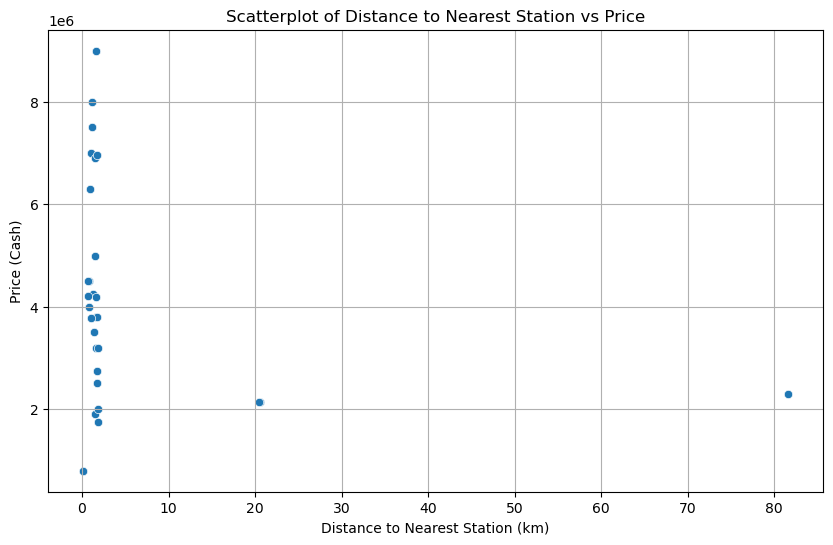

In [54]:
# Mocking up the DataFrame with the additional columns
#scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_to_nearest_station', y='priceCash', data=Final_Real_Estate_Postings)
plt.title('Scatterplot of Distance to Nearest Station vs Price')
plt.xlabel('Distance to Nearest Station (km)')
plt.ylabel('Price (Cash)')
plt.grid(True)
plt.show()



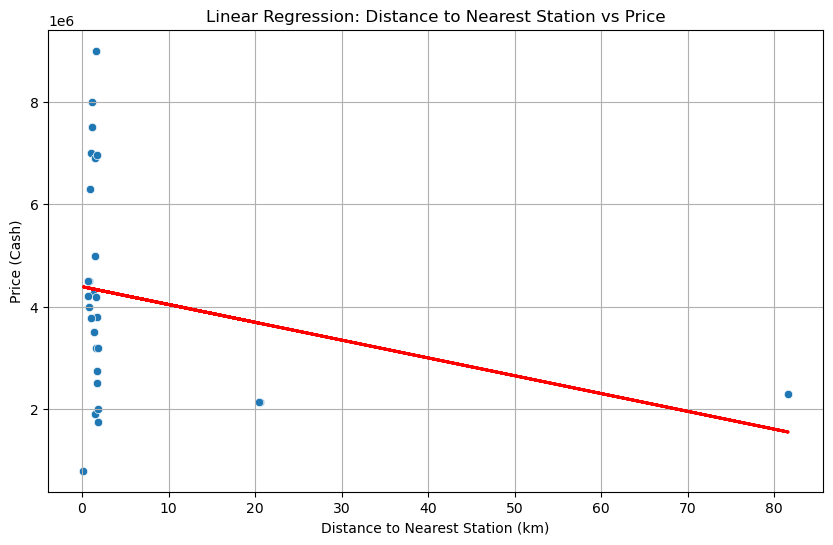

(-34778.05273153396, 4388491.241722333)

In [55]:
# Linear Regression
X = Final_Real_Estate_Postings[['distance_to_nearest_station']]
y = Final_Real_Estate_Postings['priceCash']

# Creating the model
model = LinearRegression()
model.fit(X, y)

# Predicting based on the model
predictions = model.predict(X)

# Plotting the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_to_nearest_station', y='priceCash', data=Final_Real_Estate_Postings)
plt.plot(Final_Real_Estate_Postings['distance_to_nearest_station'], predictions, color='red', linewidth=2)
plt.title('Linear Regression: Distance to Nearest Station vs Price')
plt.xlabel('Distance to Nearest Station (km)')
plt.ylabel('Price (Cash)')
plt.grid(True)
plt.show()

# Coefficient and intercept
model_coef = model.coef_[0]
model_intercept = model.intercept_

model_coef, model_intercept

In [56]:
import statsmodels.api as sm

# Add a constant (intercept) to the model
X_with_constant = sm.add_constant(X)

# Fit the regression model using statsmodels
model = sm.OLS(y, X_with_constant).fit()

# Print the summary which includes p-values
print(model.summary())b

                            OLS Regression Results                            
Dep. Variable:              priceCash   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     3.908
Date:                Fri, 16 Aug 2024   Prob (F-statistic):             0.0530
Time:                        12:03:50   Log-Likelihood:                -923.80
No. Observations:                  58   AIC:                             1852.
Df Residuals:                      56   BIC:                             1856.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [62]:
# Function to extract the required fields
def extract_address_info(address):
    road_name = address.get('roadName', '')
    zip_code = address.get('zipCode', '')
    municipality_code = address.get('municipality', {}).get('municipalityCode', '')
    name = address.get('city', {}).get('name', '')
    
    return f"Name: {name}, Road: {road_name}, Zip Code: {zip_code}, Municipality Code: {municipality_code}"


# Apply the function to each row
Final_Real_Estate_Postings['address_clean'] = Final_Real_Estate_Postings['address'].apply(extract_address_info)

# Display the result
Final_Real_Estate_Postings[['address_clean']]

,address_clean
0,"Name: København SV, Road: Martin Luther Kings Vej, Zip Code: 2450, Municipality Code: 101"
1,"Name: København K, Road: Takkelloftvej, Zip Code: 1437, Municipality Code: 101"
2,"Name: København SV, Road: George Marshalls Vej, Zip Code: 2450, Municipality Code: 101"
3,"Name: København K, Road: Refshalevej, Zip Code: 1432, Municipality Code: 101"
4,"Name: Hemmet, Road: Molen, Zip Code: 6893, Municipality Code: 760"
5,"Name: København K, Road: Takkelloftvej, Zip Code: 1437, Municipality Code: 101"
6,"Name: København K, Road: Strandgade, Zip Code: 1401, Municipality Code: 101"
7,"Name: København K, Road: Refshalevej, Zip Code: 1432, Municipality Code: 101"
8,"Name: Ishøj, Road: Søhesten, Zip Code: 2635, Municipality Code: 183"
9,"Name: Hemmet, Road: Molen, Zip Code: 6893, Municipality Code: 760"


In [64]:
# Find the row with the maximum distance to the nearest station
max_distance_row = Final_Real_Estate_Postings.loc[Final_Real_Estate_Postings['distance_to_nearest_station'].idxmax()]

# Extract the clean address for this row
clean_address = extract_address_info(max_distance_row['address'])

# Print the clean address
print("Clean Address for the row with max distance to nearest station:")
print(clean_address)


Clean Address for the row with max distance to nearest station:
Name: Grenaa, Road: Skakkes Holm, Zip Code: 8500, Municipality Code: 707
